In [1]:
import os
import time
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader,Dataset
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from zipfile import ZipFile
import skimage.io
from PIL import Image
import seaborn as sns
from sklearn.manifold import TSNE


from mnist_generator import get_mnist_loaders
from mnistm_generator import get_mnistm_loaders
from DANN import *
from DA import *
from test import *
from train import *
from visualize import *
from util import *

# make sure using CPU

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [3]:
device

device(type='cuda', index=0)

# mnist dataset

In [4]:
mnist_train_loader,mnist_eval_loader, mnist_test_loader = get_mnist_loaders(batch_size=128)

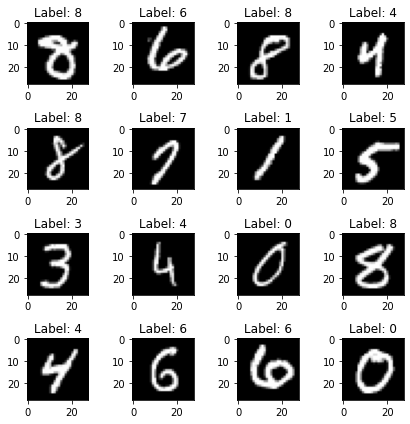

In [5]:

visualize_mnist(mnist_train_loader,4)

# mnistm dataset

In [6]:

mnistm_train_loader, mnistm_eval_loader,mnistm_test_loader = get_mnistm_loaders(batch_size=128)

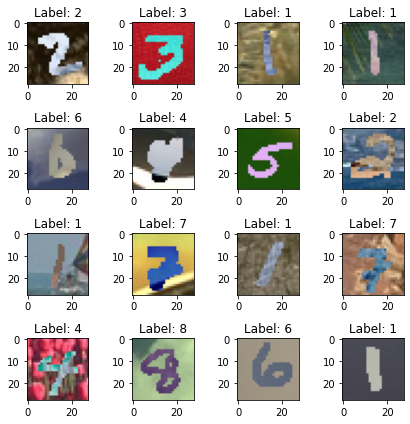

In [7]:
visualize_mnistm(mnistm_train_loader,4)

# visualization of representation of the original datasets

In [8]:
features, labels = generate_domain_datas(mnist_train_loader, mnistm_train_loader)

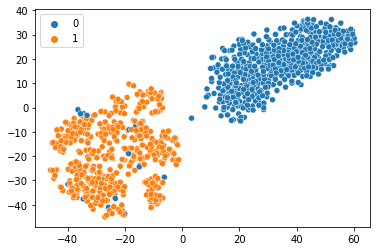

In [10]:
visualize_domain_tSNE(features, labels, size=1000)

# source only

In [11]:
source_accs,dann_source_only = DANNTrain_source_only(mnist_train_loader, 
                                                                    mnist_eval_loader,
                                                                    epochs=100)

1/100: source_acc: 0.8818333333333334
2/100: source_acc: 0.9307166666666666
3/100: source_acc: 0.94675
4/100: source_acc: 0.9552833333333334
5/100: source_acc: 0.95935
6/100: source_acc: 0.9636833333333333
7/100: source_acc: 0.96655
8/100: source_acc: 0.96845
9/100: source_acc: 0.9704666666666667
10/100: source_acc: 0.9717
11/100: source_acc: 0.9737833333333333
12/100: source_acc: 0.9739833333333333
13/100: source_acc: 0.9758166666666667
14/100: source_acc: 0.97645
15/100: source_acc: 0.97605
16/100: source_acc: 0.9783
17/100: source_acc: 0.9781333333333333
18/100: source_acc: 0.9790833333333333
19/100: source_acc: 0.9801166666666666
20/100: source_acc: 0.97995
21/100: source_acc: 0.9802666666666666
22/100: source_acc: 0.9811
23/100: source_acc: 0.9809333333333333
24/100: source_acc: 0.98095
25/100: source_acc: 0.9819833333333333
26/100: source_acc: 0.98185
27/100: source_acc: 0.9825
28/100: source_acc: 0.9831
29/100: source_acc: 0.98235
30/100: source_acc: 0.9836833333333334
31/100: s

In [12]:
save_model(dann_source_only,"./models/dann_source_only.pt")

# target only

In [13]:
target_accs, dann_target_only = DANNTrain_source_only(mnistm_train_loader, mnistm_eval_loader, epochs=100)

1/100: source_acc: 0.6040666666666666
2/100: source_acc: 0.7875333333333333
3/100: source_acc: 0.8496
4/100: source_acc: 0.8753166666666666
5/100: source_acc: 0.88915
6/100: source_acc: 0.8967
7/100: source_acc: 0.9036666666666666
8/100: source_acc: 0.90785
9/100: source_acc: 0.91305
10/100: source_acc: 0.9169166666666667
11/100: source_acc: 0.9195333333333333
12/100: source_acc: 0.9222166666666667
13/100: source_acc: 0.92465
14/100: source_acc: 0.9261666666666667
15/100: source_acc: 0.92595
16/100: source_acc: 0.9294166666666667
17/100: source_acc: 0.9296
18/100: source_acc: 0.93015
19/100: source_acc: 0.9327166666666666
20/100: source_acc: 0.93365
21/100: source_acc: 0.9352833333333334
22/100: source_acc: 0.9361833333333334
23/100: source_acc: 0.9365333333333333
24/100: source_acc: 0.9361166666666667
25/100: source_acc: 0.93485
26/100: source_acc: 0.9369666666666666
27/100: source_acc: 0.9376333333333333
28/100: source_acc: 0.93805
29/100: source_acc: 0.9395
30/100: source_acc: 0.939

In [14]:
save_model(dann_target_only,"./models/dann_target_only.pt")

# classifier only

In [16]:
source_accs, target_accs, dann_classify_only = DANNTrain_classify_only(mnist_train_loader,mnist_eval_loader,mnistm_train_loader, mnistm_eval_loader, epochs=100)

1/100: source_acc: 0.9172833333333333, target_acc 0.7695333333333333
2/100: source_acc: 0.9447, target_acc 0.8530833333333333
3/100: source_acc: 0.9547166666666667, target_acc 0.8776
4/100: source_acc: 0.9610166666666666, target_acc 0.894
5/100: source_acc: 0.9656, target_acc 0.9040333333333334
6/100: source_acc: 0.9678166666666667, target_acc 0.9090333333333334
7/100: source_acc: 0.9704333333333334, target_acc 0.9135333333333333
8/100: source_acc: 0.9719833333333333, target_acc 0.9191833333333334
9/100: source_acc: 0.97175, target_acc 0.9219833333333334
10/100: source_acc: 0.9735666666666667, target_acc 0.9245
11/100: source_acc: 0.97495, target_acc 0.9262333333333334
12/100: source_acc: 0.97525, target_acc 0.9276166666666666
13/100: source_acc: 0.9774833333333334, target_acc 0.9301
14/100: source_acc: 0.97685, target_acc 0.9304666666666667
15/100: source_acc: 0.97825, target_acc 0.93335
16/100: source_acc: 0.97765, target_acc 0.9346833333333333
17/100: source_acc: 0.9796833333333334,

In [17]:
save_model(dann_classify_only,'./models/dann_classify_only.pt')

# build DANN model

In [18]:
source_accs, target_accs, domain_accs, dann = DANNTrain(
      mnist_train_loader,
      mnistm_train_loader,
      mnist_eval_loader,
      mnistm_eval_loader,
      epochs=300,
      intervals = 30)

30/300: source_acc: 0.9681166666666666,target_acc: 0.8249, domain_acc: 0.6503666666666666
60/300: source_acc: 0.9706166666666667,target_acc: 0.8832166666666666, domain_acc: 0.5968583333333334
90/300: source_acc: 0.972,target_acc: 0.8914, domain_acc: 0.569275
120/300: source_acc: 0.9779333333333333,target_acc: 0.8986333333333333, domain_acc: 0.5768333333333333
150/300: source_acc: 0.9802666666666666,target_acc: 0.8997666666666667, domain_acc: 0.574125
180/300: source_acc: 0.9828166666666667,target_acc: 0.8965833333333333, domain_acc: 0.5678833333333333
210/300: source_acc: 0.9835,target_acc: 0.90625, domain_acc: 0.5698833333333333
240/300: source_acc: 0.9849666666666667,target_acc: 0.9029, domain_acc: 0.5660916666666667
270/300: source_acc: 0.98415,target_acc: 0.9070666666666667, domain_acc: 0.55015
300/300: source_acc: 0.9864166666666667,target_acc: 0.9088666666666667, domain_acc: 0.560275


In [36]:
# USE WHEN YOU WANT TO LOAD THE SAVED MODEL
dann = load_DANN("./models/dann_v1.pt")

In [19]:
s_acc, t_acc, domain_acc = DANNAccuracy(dann, mnist_test_loader,mnistm_test_loader)
print(f'source_acc: {s_acc},target_acc: {t_acc}, domain_acc: {domain_acc}')

source_acc: 0.9753,target_acc: 0.9094, domain_acc: 0.5634


In [44]:
features, labels = generate_domain_datas_from_dann(dann, mnist_train_loader,mnistm_train_loader)

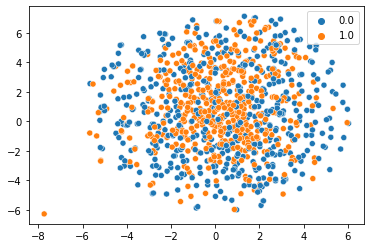

In [45]:
visualize_domain_tSNE(features, labels,size=1000)

In [22]:
# USE WHEN YOU WANT TO SAVE OR UPDATE THE MODEL
save_model(dann,"./models/dann_v1.pt")

# Denoising Autoencoders

In [23]:
loss_arr, autoencoder = DATrain(mnist_train_loader, mnistm_train_loader, mnist_eval_loader, mnistm_eval_loader,1000,300,intervals=30)

30/300: avg_loss:0.024014877155423164
60/300: avg_loss:0.020862631499767303
90/300: avg_loss:0.017290571704506874
120/300: avg_loss:0.01766866073012352
150/300: avg_loss:0.018362030386924744
180/300: avg_loss:0.018653718754649162
210/300: avg_loss:0.019026244059205055
240/300: avg_loss:0.01924067549407482
270/300: avg_loss:0.0189040657132864
300/300: avg_loss:0.01968919113278389


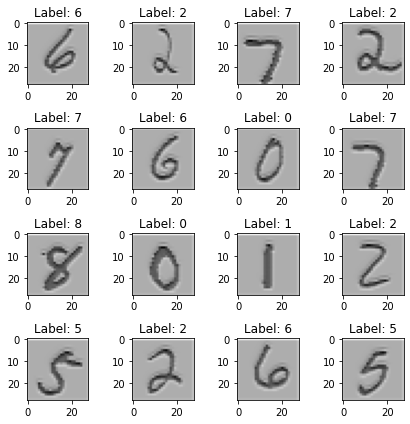

In [24]:
visualize_from_DA(autoencoder,mnist_train_loader,4)

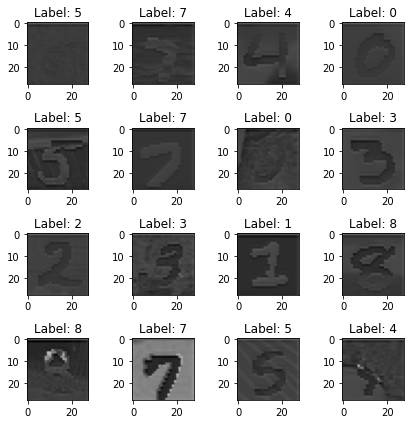

In [25]:
visualize_from_DA(autoencoder,mnistm_train_loader,4)

In [26]:
save_model(autoencoder,"./models/da_v1.pt")

In [8]:
autoencoder = DenoisingAutoencoder(100)
autoencoder = load_DA("./models/da_v1.pt")

In [28]:
features, labels = generate_domain_datas_DA(autoencoder, mnist_train_loader,mnistm_train_loader)

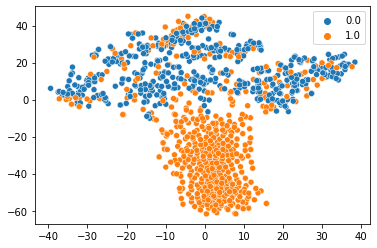

In [29]:
visualize_domain_tSNE(features, labels,size=1000)

# DANN with encoder from autoencoder

In [9]:
source_accs, target_accs, domain_accs, dann_da=DANNTrain_with_DA(autoencoder, 
                                                                                mnist_train_loader, 
                                                                                mnistm_train_loader, 
                                                                                mnist_eval_loader, 
                                                                                mnistm_eval_loader, 
                                                                                300,30)

30/300: source_acc: 0.9631666666666666,target_acc: 0.81415, domain_acc: 0.6426
60/300: source_acc: 0.9730333333333333,target_acc: 0.8732333333333333, domain_acc: 0.5981916666666667
90/300: source_acc: 0.9743166666666667,target_acc: 0.88865, domain_acc: 0.5634666666666667
120/300: source_acc: 0.9809666666666667,target_acc: 0.89715, domain_acc: 0.5755916666666666
150/300: source_acc: 0.98305,target_acc: 0.9007666666666667, domain_acc: 0.56555
180/300: source_acc: 0.9834,target_acc: 0.90265, domain_acc: 0.5620083333333333
210/300: source_acc: 0.9848,target_acc: 0.9057333333333333, domain_acc: 0.55535
240/300: source_acc: 0.9865833333333334,target_acc: 0.9084, domain_acc: 0.5503666666666667
270/300: source_acc: 0.9872,target_acc: 0.9096166666666666, domain_acc: 0.558375
300/300: source_acc: 0.9893333333333333,target_acc: 0.9103333333333333, domain_acc: 0.5624333333333333


In [10]:
save_model(dann_da, "./models/dann_da_v1.pt")

In [11]:
DANNAccuracy_with_DA(dann_da,autoencoder, mnist_test_loader, mnistm_test_loader)

(0.9741, 0.9053, 0.56605)

In [49]:
features, labels = generate_domain_datas_from_extractor_with_DA(dann_da,autoencoder, mnist_train_loader,mnistm_train_loader)

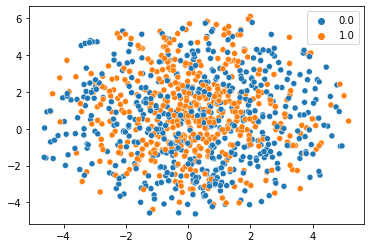

In [50]:
visualize_domain_tSNE(features, labels,size=1000)